In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import os
import sys
module_path = os.path.abspath('src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/ilya/Documents/kaggle_data-science-bowl-2018/src


In [3]:
import data
from metrics import mean_iou, jacard_coef, dice_coef,dice_coef_loss
import config
params = config.devbox

/home/ilya/.pyenv/versions/3.5.4/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
from keras.models import load_model
from keras import backend as K
import tensorflow as tf

In [76]:
!ls /home/ilya/Data/bowl2018/output/unet--1518191019

weights-improvement-01-0.65.hdf5  weights-improvement-17-0.73.hdf5
weights-improvement-02-0.67.hdf5  weights-improvement-18-0.73.hdf5
weights-improvement-03-0.69.hdf5  weights-improvement-19-0.74.hdf5
weights-improvement-04-0.70.hdf5  weights-improvement-20-0.74.hdf5
weights-improvement-05-0.70.hdf5  weights-improvement-21-0.74.hdf5
weights-improvement-06-0.71.hdf5  weights-improvement-22-0.74.hdf5
weights-improvement-07-0.71.hdf5  weights-improvement-23-0.74.hdf5
weights-improvement-08-0.72.hdf5  weights-improvement-24-0.74.hdf5
weights-improvement-09-0.72.hdf5  weights-improvement-25-0.74.hdf5
weights-improvement-10-0.72.hdf5  weights-improvement-26-0.74.hdf5
weights-improvement-11-0.72.hdf5  weights-improvement-27-0.74.hdf5
weights-improvement-12-0.73.hdf5  weights-improvement-28-0.74.hdf5
weights-improvement-13-0.73.hdf5  weights-improvement-29-0.74.hdf5
weights-improvement-14-0.73.hdf5  weights-improvement-30-0.74.hdf5
weights-improvement-15-0.73.hdf5  weights-improvement-31-0.74.

In [77]:
with tf.device('/cpu:0'):
    model = load_model('/home/ilya/Data/bowl2018/output/unet--1518191019/weights-improvement-31-0.74.hdf5', {'mean_iou': mean_iou, 'dice_coef': dice_coef, 'dice_coef_loss': dice_coef_loss})

In [17]:
train_gen, val_gen = data.make_train_generator(params)

  0%|          | 0/536 [00:00<?, ?it/s]

Loading data
Find 670 train_ids


100%|██████████| 134/134 [00:07<00:00, 17.40it/s]


Data loaded


In [35]:
d = next(train_gen)

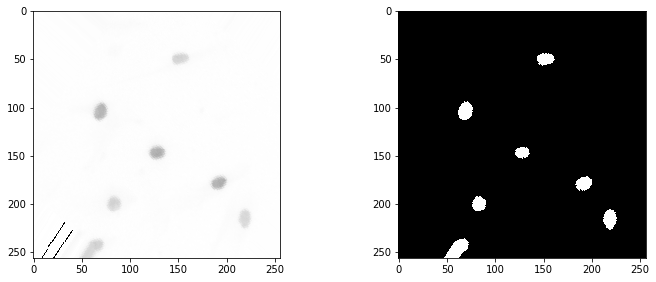

In [134]:
i = 14
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.imshow(d[0][i])
plt.subplot(222)
plt.imshow(d[1][i].reshape((256,256)), cmap='gray')

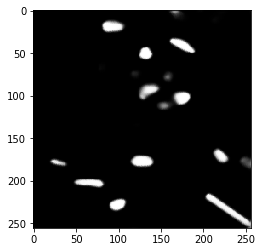

In [133]:
mask = model.predict(d[0][i].reshape(1,256,256,3))
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

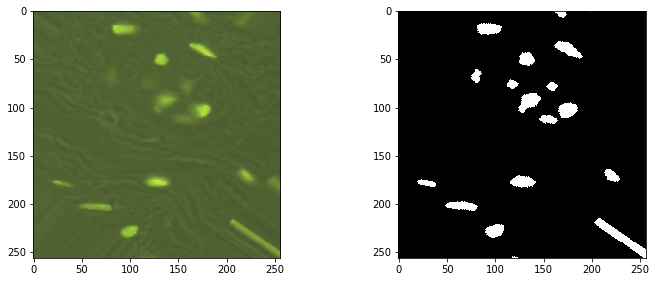

In [132]:
i = 13
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.imshow(d[0][i])
plt.subplot(222)
plt.imshow(d[1][i].reshape((256,256)), cmap='gray')

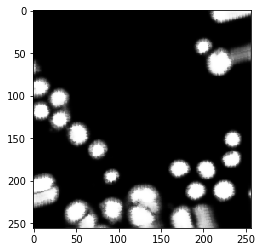

In [131]:
mask = model.predict(d[0][i].reshape(1,256,256,3))
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

In [6]:
test_paths = data.make_test_df(params)
test_imgs = data.read_resize_images(test_paths)

  8%|▊         | 5/65 [00:00<00:01, 45.25it/s]

Find 65 test_ids


100%|██████████| 65/65 [00:01<00:00, 49.69it/s]


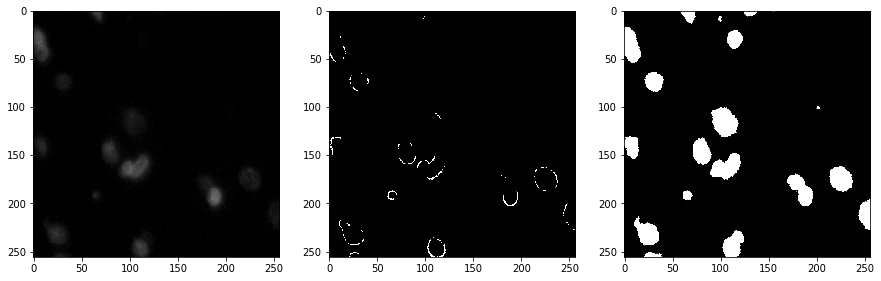

In [48]:
with tf.device('/cpu:0'):
    i = 11
    mask = model.predict(test_imgs[i].reshape(1,256,256,3))
    
    plt.figure(figsize=(15,20))
    plt.subplot(331)
    plt.imshow(test_imgs[i])
    plt.subplot(332)
    plt.imshow(mask[0,:,:,1].reshape((256,256)), cmap='gray')
    plt.subplot(333)
    plt.imshow(mask[0,:,:,0].reshape((256,256)), cmap='gray')

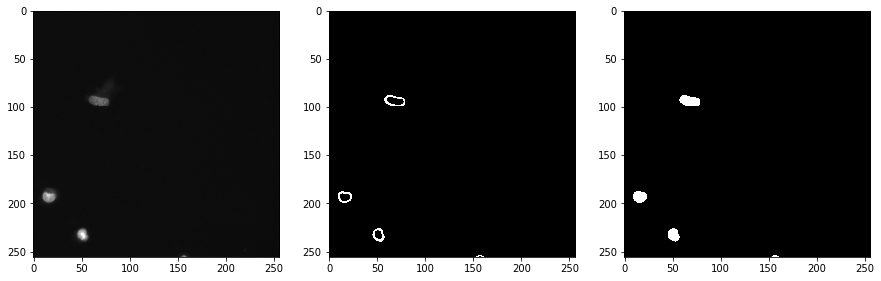

In [28]:
with tf.device('/cpu:0'):
    i = 20
    mask = model.predict(test_imgs[i].reshape(1,256,256,3))
    
    plt.figure(figsize=(15,20))
    plt.subplot(331)
    plt.imshow(test_imgs[i])
    plt.subplot(332)
    plt.imshow(mask[0,:,:,1].reshape((256,256)), cmap='gray')
    plt.subplot(333)
    plt.imshow(mask[0,:,:,0].reshape((256,256)), cmap='gray')

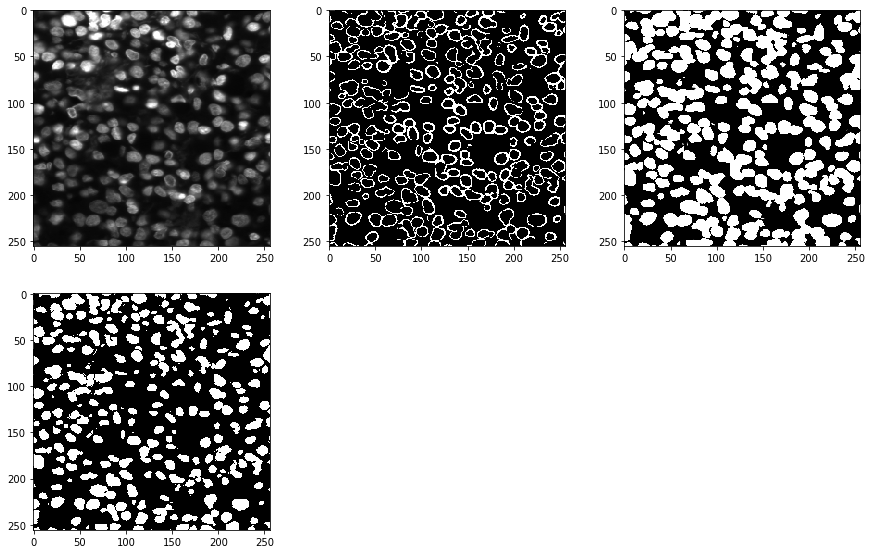

In [78]:
with tf.device('/cpu:0'):
    i = 14
    mask = model.predict(test_imgs[i].reshape(1,256,256,3))
    
    plt.figure(figsize=(15,20))
    plt.subplot(431)
    plt.imshow(test_imgs[i])
    plt.subplot(432)
    plt.imshow(mask[0,:,:,1].reshape((256,256)), cmap='gray')
    plt.subplot(433)
    plt.imshow(mask[0,:,:,0].reshape((256,256)), cmap='gray')
    
    edges = mask[0,:,:,1].reshape((256,256)) < 0.8
    segments = mask[0,:,:,0].reshape((256,256)) > 0.8
    plt.subplot(434)
    plt.imshow(segments & edges, cmap='gray')

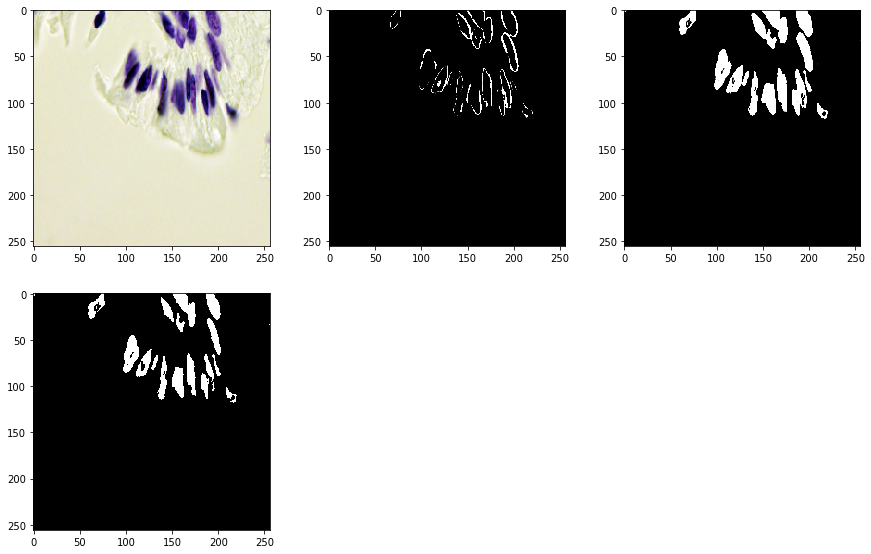

In [79]:
with tf.device('/cpu:0'):
    i = 4
    mask = model.predict(test_imgs[i].reshape(1,256,256,3))
    
    plt.figure(figsize=(15,20))
    plt.subplot(431)
    plt.imshow(test_imgs[i])
    plt.subplot(432)
    plt.imshow(mask[0,:,:,1].reshape((256,256)), cmap='gray')
    plt.subplot(433)
    plt.imshow(mask[0,:,:,0].reshape((256,256)), cmap='gray')
    
    edges = mask[0,:,:,1].reshape((256,256)) < 0.8
    segments = mask[0,:,:,0].reshape((256,256)) > 0.8
    plt.subplot(434)
    plt.imshow(segments & edges, cmap='gray')

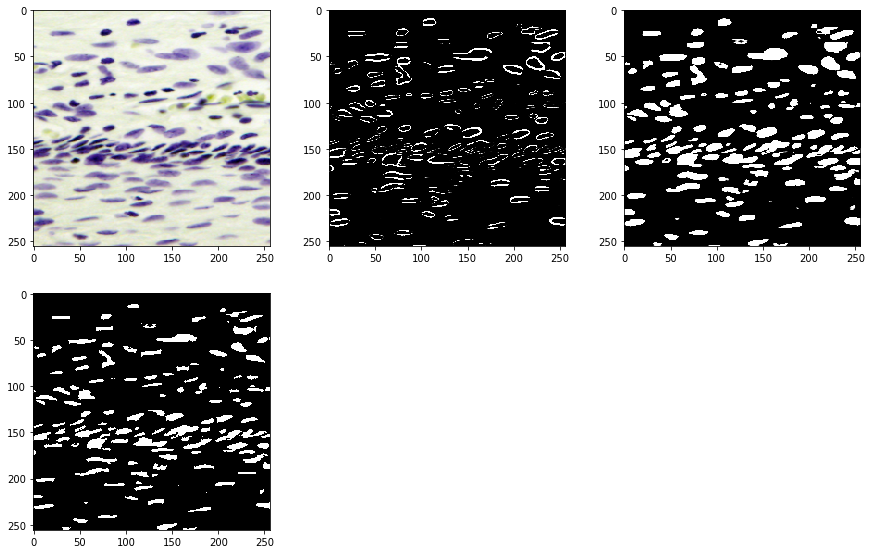

In [80]:
with tf.device('/cpu:0'):
    i = 50
    mask = model.predict(test_imgs[i].reshape(1,256,256,3))
    
    plt.figure(figsize=(15,20))
    plt.subplot(431)
    plt.imshow(test_imgs[i])
    plt.subplot(432)
    plt.imshow(mask[0,:,:,1].reshape((256,256)), cmap='gray')
    plt.subplot(433)
    plt.imshow(mask[0,:,:,0].reshape((256,256)), cmap='gray')
    
    edges = mask[0,:,:,1].reshape((256,256)) < 0.8
    segments = mask[0,:,:,0].reshape((256,256)) > 0.8
    plt.subplot(434)
    plt.imshow(segments & edges, cmap='gray')

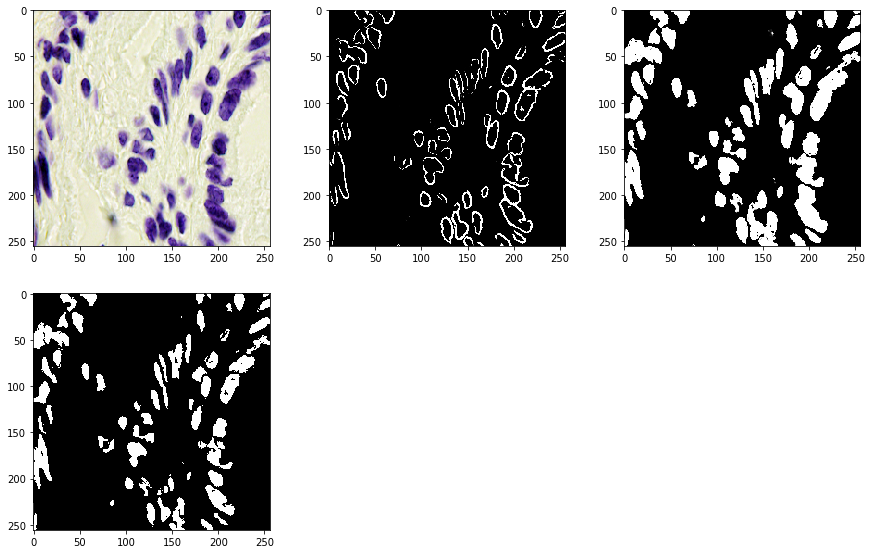

In [81]:
with tf.device('/cpu:0'):
    i = 48
    mask = model.predict(test_imgs[i].reshape(1,256,256,3))
    
    plt.figure(figsize=(15,20))
    plt.subplot(431)
    plt.imshow(test_imgs[i])
    plt.subplot(432)
    plt.imshow(mask[0,:,:,1].reshape((256,256)), cmap='gray')
    plt.subplot(433)
    plt.imshow(mask[0,:,:,0].reshape((256,256)), cmap='gray')
    
    edges = mask[0,:,:,1].reshape((256,256)) < 0.8
    segments = mask[0,:,:,0].reshape((256,256)) > 0.8
    plt.subplot(434)
    plt.imshow(segments & edges, cmap='gray')

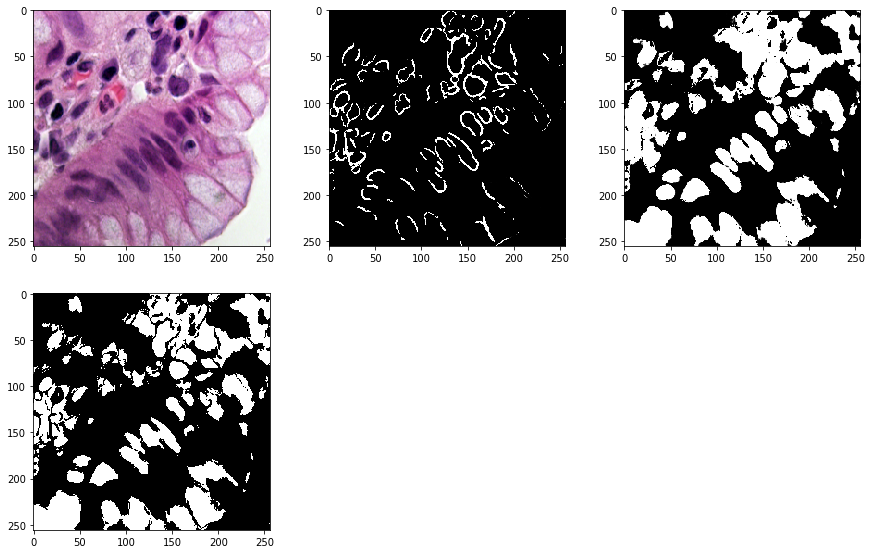

In [82]:
with tf.device('/cpu:0'):
    i = 37
    mask = model.predict(test_imgs[i].reshape(1,256,256,3))
    
    plt.figure(figsize=(15,20))
    plt.subplot(431)
    plt.imshow(test_imgs[i])
    plt.subplot(432)
    plt.imshow(mask[0,:,:,1].reshape((256,256)), cmap='gray')
    plt.subplot(433)
    plt.imshow(mask[0,:,:,0].reshape((256,256)), cmap='gray')
    
    edges = mask[0,:,:,1].reshape((256,256)) < 0.8
    segments = mask[0,:,:,0].reshape((256,256)) > 0.8
    plt.subplot(434)
    plt.imshow(segments & edges, cmap='gray')